In [27]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
data = pd.read_csv('non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


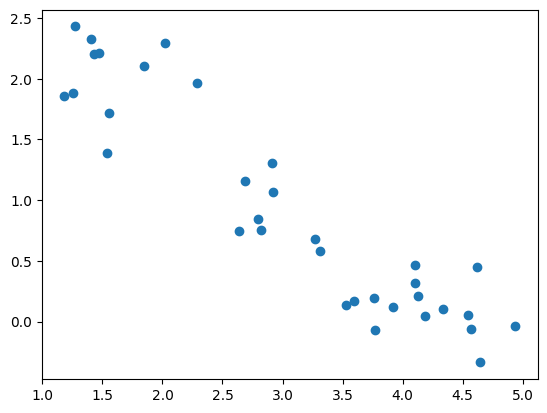

In [29]:
plt.scatter(data.x_train, data.y_train)


In [30]:
def gradient(X, y, w) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

In [34]:
def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current[0], w_next[0])
    return (w_next, weight_evolution, grad)

In [38]:
def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.0001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

In [39]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.00397, grad=[-0.47621672  0.13756957]
step 200 |w-w_next|=0.00326, grad=[-0.39189104  0.11320952]
step 300 |w-w_next|=0.00269, grad=[-0.32249725  0.09316304]
step 400 |w-w_next|=0.00221, grad=[-0.26539131  0.07666627]
step 500 |w-w_next|=0.00182, grad=[-0.21839735  0.06309065]
step 600 |w-w_next|=0.00150, grad=[-0.17972482  0.05191892]
step 700 |w-w_next|=0.00123, grad=[-0.14790019  0.04272542]
step 800 |w-w_next|=0.00101, grad=[-0.12171088  0.03515985]
step 900 |w-w_next|=0.00083, grad=[-0.10015903  0.02893395]
step 1000 |w-w_next|=0.00069, grad=[-0.08242345  0.02381049]
step 1100 |w-w_next|=0.00056, grad=[-0.06782838  0.01959427]
step 1200 |w-w_next|=0.00046, grad=[-0.05581773  0.01612463]
step 1300 |w-w_next|=0.00038, grad=[-0.04593385  0.01326937]
step 1400 |w-w_next|=0.00031, grad=[-0.03780015  0.01091971]
step 1500 |w-w_next|=0.00026, grad=[-0.03110672  0.00898611]
step 1600 |w-w_next|=0.00021, grad=[-0.02559852  0.0073949 ]
step 1700 |w-w_next|=0.00018, gra